<a href="https://colab.research.google.com/github/GoPlusUltra/Airbnb-2019-dataset-EDA/blob/main/EDA_on_Airbnb_2019_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WHAT IS AIRBNB?

 Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. Explore and analyze the data to discover key understandings (not limited to these) such as : What can we learn about different hosts and areas? What can we learn from predictions? (ex: locations, prices, reviews, etc) Which hosts are the busiest and why? Is there any noticeable difference of traffic among different areas and what could be the reason for it?

[2]
0s


In [56]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
%lsmagic 

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

In [4]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
df= pd.read_csv('/content/drive/MyDrive/Airbnb_data.csv')

steps we are going to follow:-
1. understand the data.
2. ask right questions
3. find how to work on each questions
4. find effective different ways to showcase the findings.
5. Present the notebook in cleanest way.
6. At last add conclusions.


In [6]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We almost got all the data, thats good.

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
len(df['name'].unique()) # As name column has too many unique entries we can drop it.

47906

In [12]:
df.last_review.tail(5)   #We can do something with this data in additional task.

48890    NaN
48891    NaN
48892    NaN
48893    NaN
48894    NaN
Name: last_review, dtype: object

We would like to keep original dataframe as it is. In case we get some idea to do with dropped columns, we will use it. For now we are creating new DataFrame and DROPPING 'name' and 'last review' column.

In [13]:
new_df = df[['id','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights','latitude', 'longitude',
             'number_of_reviews','calculated_host_listings_count','availability_365']]

# We will study the impact of Minimum Nights on the mean price of each room type.


In [14]:
min_nights=new_df[new_df['minimum_nights']<30].groupby(['room_type'])['minimum_nights']

In [15]:
min_nights.describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,22254.0,3.901681,4.616633,1.0,2.0,3.0,4.0,29.0
Private room,21081.0,3.147953,3.868250,1.0,1.0,2.0,3.0,29.0
Shared room,1053.0,2.527066,3.278644,1.0,1.0,1.0,2.0,27.0


As we have kept minimum_nights less than 30, we can see the mean and 75 
Percentile values of the all 3 room types is in between 2-4.
Cause our data has too many outliers.

So let's plot a graph for minimum_nights(less than 30 days) vs mean price 

In [16]:
min_nights_mean_price = new_df[new_df['minimum_nights'] < 30].groupby('minimum_nights')['price'].mean().reset_index()

Text(0.5, 1.0, 'Mean prices for 30 minimum nights')

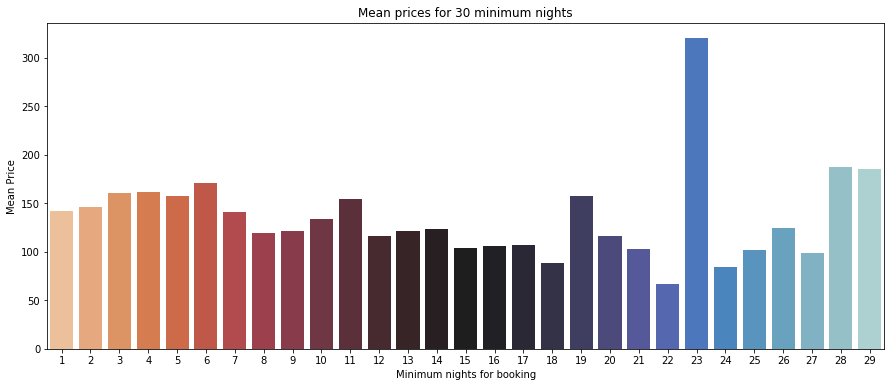

In [17]:
plt.figure(figsize=(15,6))

sns.barplot(x=min_nights_mean_price['minimum_nights'],y=min_nights_mean_price['price'],data=min_nights_mean_price,palette='icefire_r',)
plt.xlabel('Minimum nights for booking')
plt.ylabel('Mean Price')
plt.title('Mean prices for 30 minimum nights')


Thus we can see mean prices for 12 to 18 minimum nights are comparitively lesser.

# Calculating average room price for all 3 types of room in different Neighbourhood areas.

In [18]:
avg_room_price=df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()

Text(0.5, 1.0, 'Mean prices of room types by different Neighbourhood')

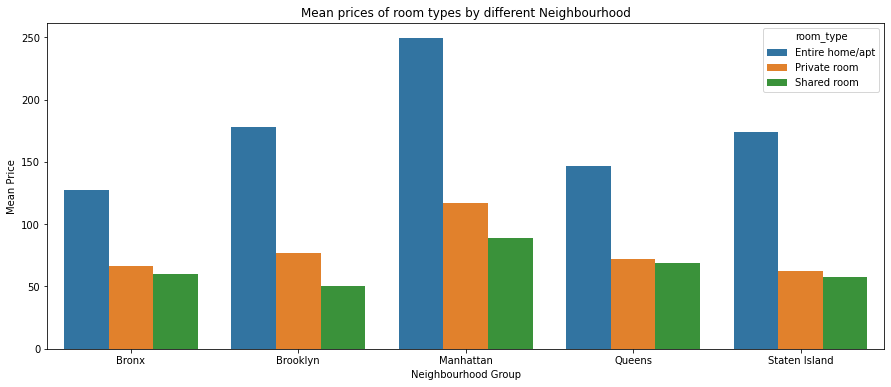

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(x=avg_room_price['neighbourhood_group'], y=avg_room_price['price'], hue=avg_room_price['room_type'], data=avg_room_price)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Mean Price')
plt.title('Mean prices of room types by different Neighbourhood')

Thus, we can see Manhattan is the costliest place to live, folllowing by Brooklyn and Staten Island.

While Bronx is Cheapest place among all Neighbourhood places.

Another observation can be made that the Mean Prices for 'Private' and 'Shared' Room Type of all Neighbourhood Groups are almost same.

# Which Neighbourhood Group is most famous??

In [20]:
new_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

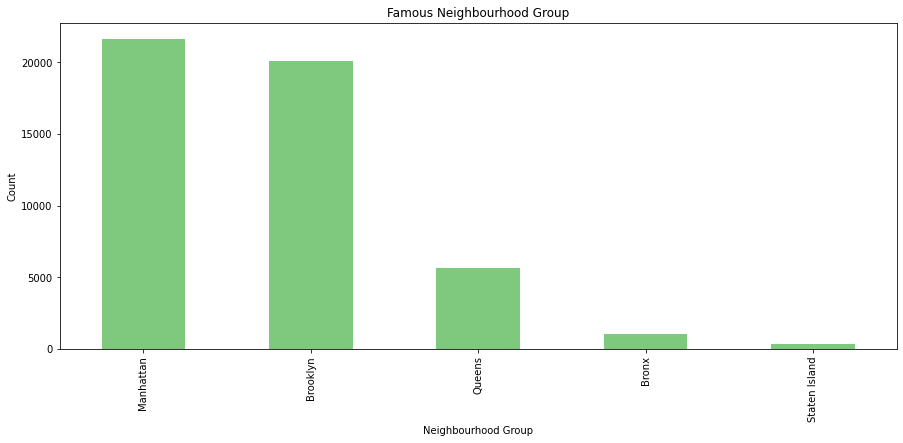

In [21]:
new_df['neighbourhood_group'].value_counts().plot(kind='bar',figsize=(15,6), cmap='Accent',
                                                  title="Famous Neighbourhood Group", xlabel='Neighbourhood Group',ylabel='Count')
plt.rcParams.update({'font.size': 12})

Thus we can conclude Manhatten has maximum numbers of listing followed by Brooklyn.

# Which Room Type has maximum booking??

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa027d78e50>],
      dtype=object)

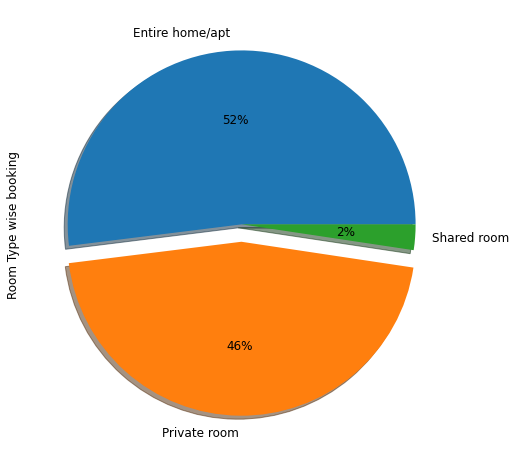

In [22]:
explode = (0, 0.1, 0)
new_df['room_type'].value_counts().plot(kind='pie', subplots=True,explode=explode,shadow=True,
                                        figsize=(8, 8),label='Room Type wise booking',
                                        autopct='%.0f%%',)

As listings for Entire home/apt and Private room are higher we can deduce that People prefer them more than Shared room.

In [23]:
availability=new_df.groupby(['availability_365'])['availability_365'].count()
availability

availability_365
0      17533
1        408
2        270
3        306
4        233
       ...  
361      111
362      166
363      239
364      491
365     1295
Name: availability_365, Length: 366, dtype: int64

As 17533 entries have 0 availability, availability_365 column is of no use

# Lets study the price patterns for each Neighbourhood Group with Hue as a Room Type.

<Figure size 1080x1440 with 0 Axes>

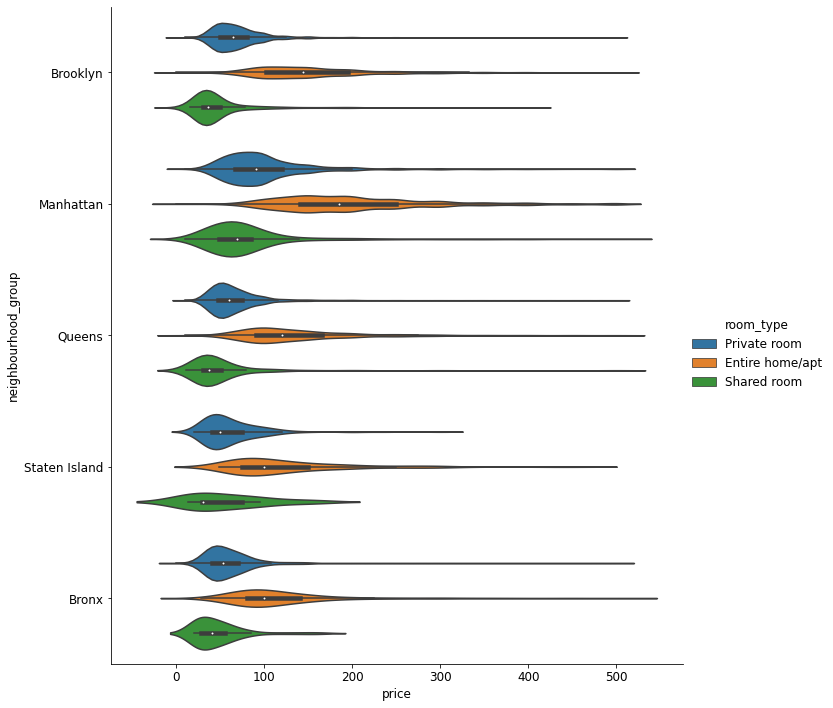

In [24]:
plt.figure(figsize=(15,20))
sns.catplot(x="price", y="neighbourhood_group", hue="room_type", data=new_df[new_df['price'] <= 500], kind='violin',height=10)
plt.rcParams.update({'font.size': 12})

We can see that Entire Home/Apartment have higher variation in price than Private and Shared room.

Mean prices of all room types and highest range of prices are belonged to Manhatten.



# Top 20 Neighbourhoods in all Neighbourhood Groups??

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

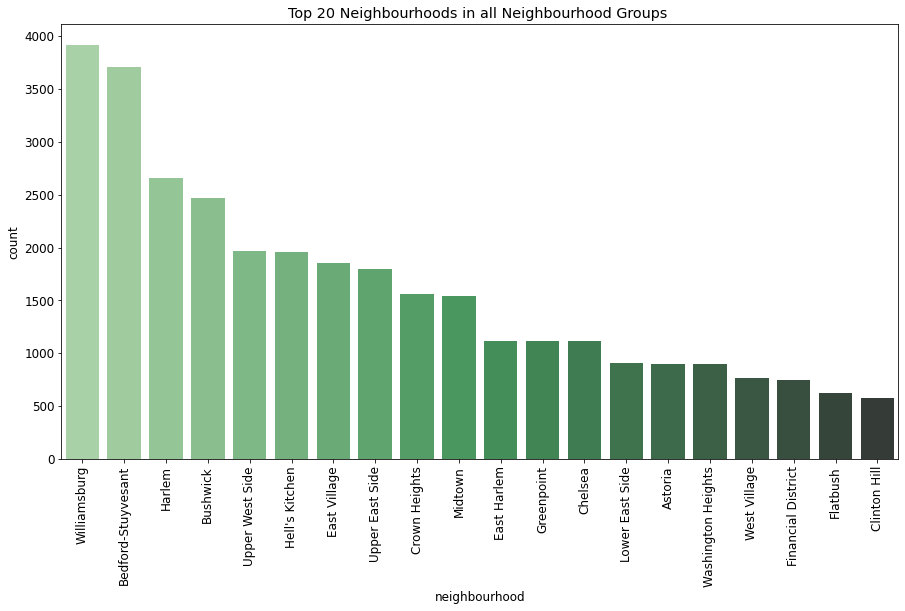

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(x="neighbourhood", data=new_df, palette="Greens_d",
              order=new_df.neighbourhood.value_counts().iloc[:20].index)
plt.title('Top 20 Neighbourhoods in all Neighbourhood Groups ')
plt.xticks(rotation=90)


# Lets find relationship between the Price and Number of Reviews.

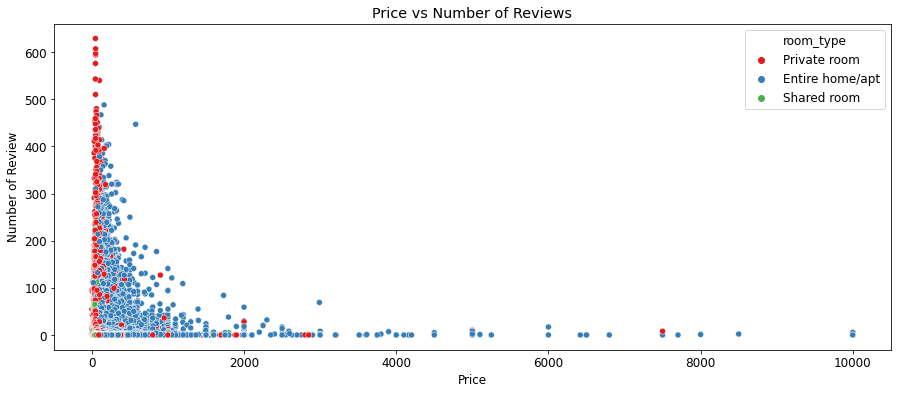

In [54]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='price',y='number_of_reviews',hue='room_type',data=new_df,palette='Set1')
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

We can deduce that People like to stay at low price rooms. Also, almost all higher price stays are of 'Entire Home/Apartment' room type.


# Which hosts are the busiest?

In [27]:
busiest_hosts = new_df.groupby(['host_name'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews',ascending=False).head(10)

Text(0.5, 1.0, 'Busiest Hosts')

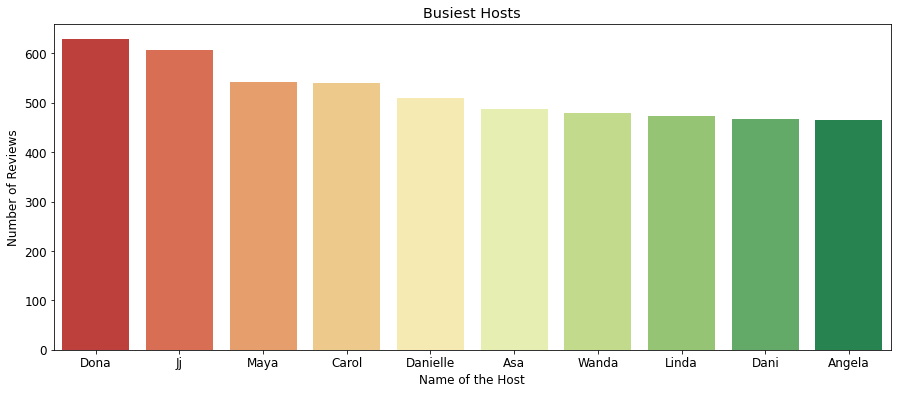

In [28]:
plt.figure(figsize=(15,6))
sns.barplot(x='host_name',y='number_of_reviews',data=busiest_hosts,palette='RdYlGn')
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")

## CONCLUSION

1. Most listings are for private and entire apartment, which concludes that most
people dont like live in shared room/apartment. People who prefer share rooms must be tourists.

2. As expected mean price of entire apartment is greater than Private room and cheapest is Shared room.

3. Another observation can be made that the Mean Prices for 'Private' and 'Shared' Room Type of all Neighbourhood Groups are almost same.

4. People tend to prefer less valued stays as per given Airbnb data.

5.  We have found that hosts take good advantage of the Airbnb platform and provide the most listings.



### Thank You !!